In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import cv2

Problem 1

(1)

In [19]:
#grayscale
I = mpimg.imread(r'D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\1.3.12.tiff')
print(I)

[[227 222 204 ... 198 197 215]
 [230 224 214 ... 221 208 201]
 [221 219 219 ... 211 209 188]
 ...
 [225 232 218 ... 200 209 212]
 [210 229 218 ... 201 208 215]
 [214 227 226 ... 213 213 213]]


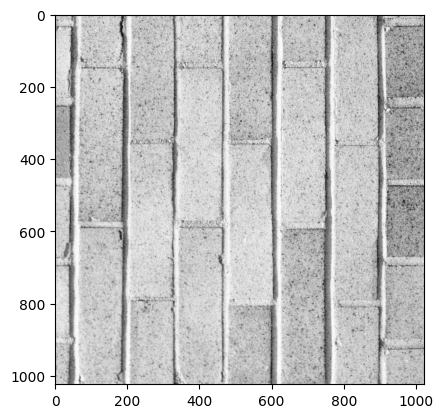

In [12]:
imgplot = plt.imshow(I,cmap='gray')

(2)

In [13]:
Max=[]
Min=[]
#finding maximum and minimum value of intensity in the matrix
for i in range(np.shape(I)[0]):
  Max.append(max(I[i]))
  Min.append(min(I[i]))
MaxPx=max(Max)
MinPx=min(Min)
print("Maximum size = ",MaxPx)
print("Minimum size = ",MinPx)
#finding bits required
bits=math.log2(MaxPx)
if type(bits)!=int:
  bits=int(bits)+1
print("Bits required = ",bits)

Maximum size =  255
Minimum size =  47
Bits required =  8


(3)

In [17]:
#size of image using os
sizeOI=os.path.getsize(r'D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\1.3.12.tiff')
print("The size of the download image is = ",sizeOI)
#size of image using matrix
size8I=np.shape(I)[0]*np.shape(I)[1]
print("The size for 8bit imge will be = ",size8I)
#efficiency
efficiency=(size8I-sizeOI)*100/size8I
print("Efficency in compression = ",efficiency)

The size of the download image is =  1048710
The size for 8bit imge will be =  262144
Efficency in compression =  -300.0511169433594


This means the image downloaded is not in compressed form.

(4)

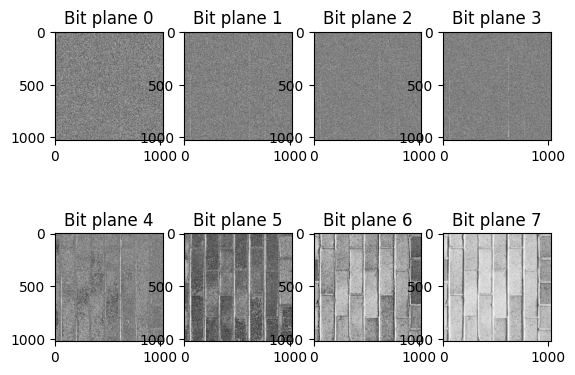

In [20]:
# function for bitplane
def bitplane(image, bitplaneNumber):
  BPI=np.mod(image/2**bitplaneNumber,2)
  plt.subplot(2,4,bitplaneNumber+1)
  plt.imshow(BPI, cmap="gray")
  plt.title(f"Bit plane {bitplaneNumber}")

for i in range(bits):
  bitplane(I,i)

(5)

In [21]:
#function for quantization
def quantize(image, B):
  num=2**B-1
  newimage=(image/255)*num
  for i in range(np.size(image, axis=0)):
    for j in range(np.size(image, axis=1)): 
      newimage[i][j]=np.uint8(newimage[i][j])
  return newimage

Text(0.5, 1.0, '1 bit')

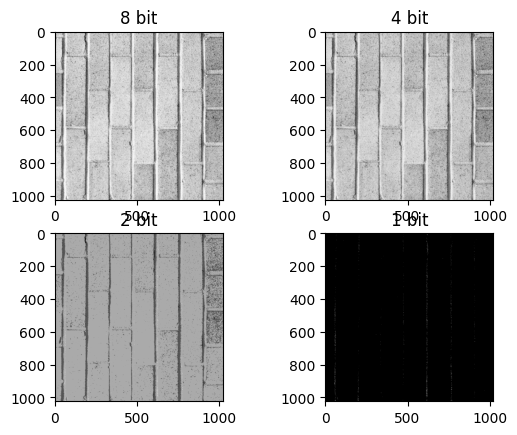

In [22]:
#quantize image with 8 levels
NI8=quantize(I,8)
plt.subplot(2,2,1)
plt.imshow(NI8, cmap="gray")
plt.title("8 bit")
#quantize image with 4 levels
NI4=quantize(I,4)
plt.subplot(2,2,2)
plt.imshow(NI4, cmap="gray")
plt.title("4 bit")
#quantize image with 2 levels
NI2=quantize(I,2)
plt.subplot(2,2,3)
plt.imshow(NI2, cmap="gray")
plt.title("2 bit")
#quantize image with 1 level
NI1=quantize(I,1)
plt.subplot(2,2,4)
plt.imshow(NI1, cmap="gray")
plt.title("1 bit")


Problem 2

(1)

[[[  2  49 223]
  [  2  49 223]
  [  2  49 223]
  ...
  [ 33  80  36]
  [ 33  75   3]
  [ 42  71  13]]

 [[  1  48 222]
  [  1  48 222]
  [  1  48 222]
  ...
  [ 31  75  52]
  [ 30  68  19]
  [ 42  69  16]]

 [[  0  47 221]
  [  0  47 221]
  [  0  47 221]
  ...
  [ 29  64  84]
  [ 28  58  56]
  [ 44  70  22]]

 ...

 [[233 175  93]
  [230 172  90]
  [231 172  92]
  ...
  [218 166  90]
  [216 164  88]
  [218 166  90]]

 [[238 177  96]
  [237 176  95]
  [237 176  95]
  ...
  [220 167  91]
  [214 161  85]
  [221 168  92]]

 [[243 182 101]
  [241 180  99]
  [241 180  99]
  ...
  [221 168  92]
  [213 160  84]
  [222 169  93]]]


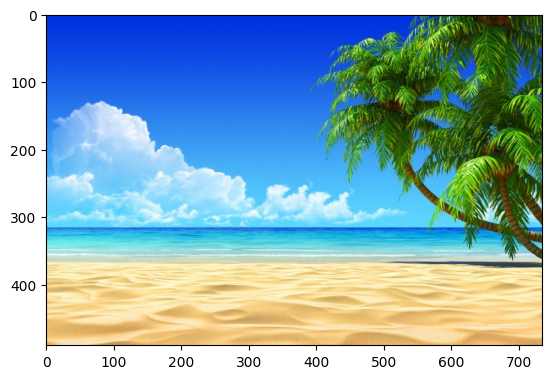

In [5]:
#RGB image
RGBimage=plt.imread(r"D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\bg1.jpg")
print(RGBimage)
plt.imshow(RGBimage)

[[  2   2   2 ...  33  33  42]
 [  1   1   1 ...  31  30  42]
 [  0   0   0 ...  29  28  44]
 ...
 [233 230 231 ... 218 216 218]
 [238 237 237 ... 220 214 221]
 [243 241 241 ... 221 213 222]]


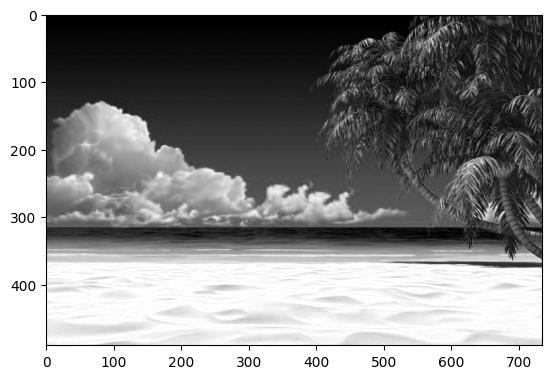

In [7]:
#Red Channel
#R=np.int_(np.zeros(np.shape(RGBimage)))
R=RGBimage[:,:,0]
print(R)
plt.imshow(R,cmap="gray")

[[ 49  49  49 ...  80  75  71]
 [ 48  48  48 ...  75  68  69]
 [ 47  47  47 ...  64  58  70]
 ...
 [175 172 172 ... 166 164 166]
 [177 176 176 ... 167 161 168]
 [182 180 180 ... 168 160 169]]


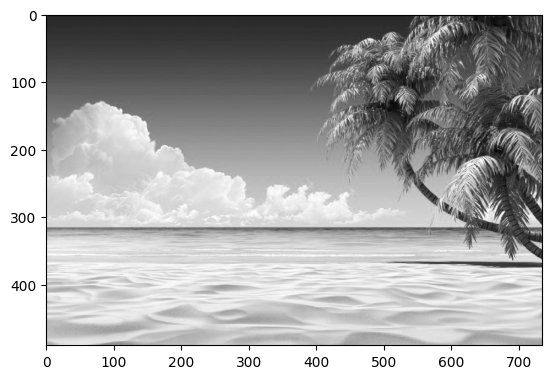

In [8]:
#Green Channel
#G=np.int_(np.zeros(np.shape(RGBimage)))
G=RGBimage[:,:,1]
print(G)
plt.imshow(G,cmap="gray")

[[223 223 223 ...  36   3  13]
 [222 222 222 ...  52  19  16]
 [221 221 221 ...  84  56  22]
 ...
 [ 93  90  92 ...  90  88  90]
 [ 96  95  95 ...  91  85  92]
 [101  99  99 ...  92  84  93]]


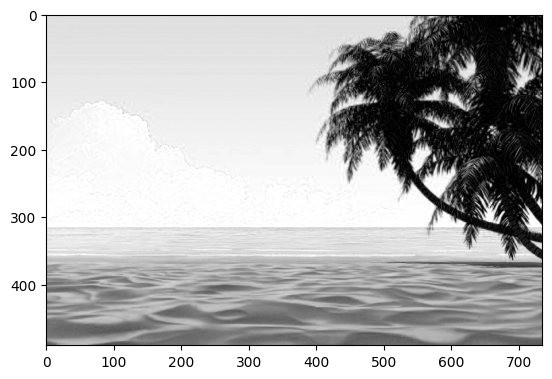

In [9]:
#Blue Channel
#B=np.int_(np.zeros(np.shape(RGBimage)))
B=RGBimage[:,:,2]
print(B)
plt.imshow(B,cmap="gray")

[[ 54  54  54 ...  60  54  55]
 [ 53  53  53 ...  59  51  54]
 [ 52  52  52 ...  55  48  56]
 ...
 [182 179 180 ... 172 170 172]
 [186 185 185 ... 174 168 175]
 [191 189 189 ... 175 167 176]]


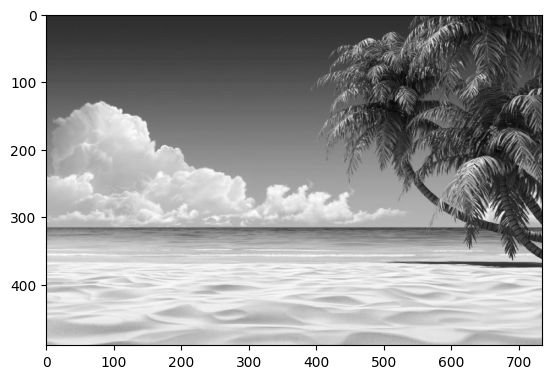

In [11]:
gray=np.int_((0.299*RGBimage[:,:,0]+0.587*RGBimage[:,:,1]+0.114*RGBimage[:,:,2]))
print(gray)
plt.imshow(gray,cmap="gray")

(2)

Maximum color in the image has pixel value:  [  9  64 225]
Color is


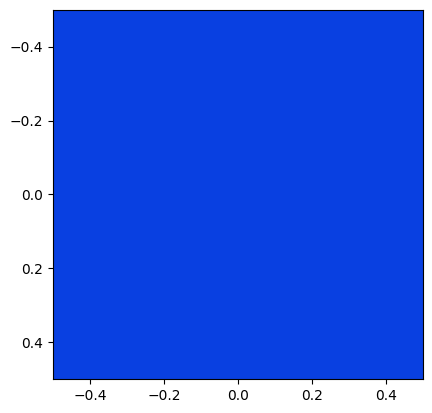

In [10]:
#find different colours with its frequency that are in the image
n,c=np.unique(RGBimage.reshape(-1, 3),return_counts=True, axis= 0)
# print(c)
p=np.argmax(c) 
# print(p)
print("Maximum color in the image has pixel value: ",n[p])
color = np.full((1, 1, 3), n[p])
print("Color is")
plt.imshow(color)

(3)

In [11]:
foreground=plt.imread(r"D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\fg1.jpg")
background=plt.imread(r"D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\bg.jpg")

In [12]:
print(foreground[0][0])

[  1 255  19]


Text(0.5, 1.0, 'foreground')

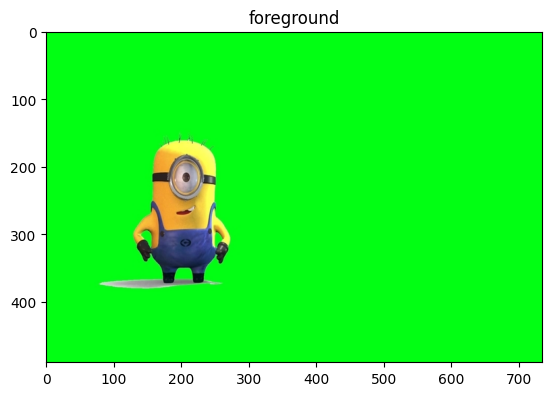

In [13]:
plt.imshow(foreground)
plt.title("foreground")

Text(0.5, 1.0, 'Background')

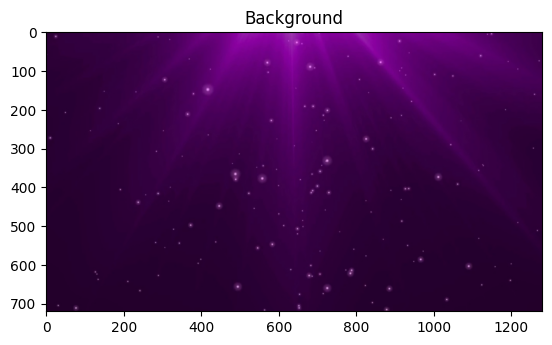

In [14]:
plt.imshow(background)
plt.title("Background")

In [15]:
print(np.shape(foreground))
print(np.shape(background))

(490, 735, 3)
(720, 1280, 3)


In [16]:
#reshaping fore ground and background image in order to have same dimensions of both the images
fg=foreground[:min(np.shape(foreground)[0],np.shape(background)[0]),:min(np.shape(foreground)[1],np.shape(background)[1]),:].astype(np.uint8)
bg=background[:min(np.shape(foreground)[0],np.shape(background)[0]),:min(np.shape(foreground)[1],np.shape(background)[1]),:].astype(np.uint8)


One can combine these images by making the pixels which are not needed in the resultant image to [0,0,0] i.e. black in both the images. After turning the undesired pixels in both the pictures to black, we can add the two matrices and get the resultant image.

In [17]:
fg1=np.reshape(fg,(-1,3))
bg1=np.reshape(bg,(-1,3))
fg2=[]
bg2=[]
for i in range(np.size(fg1,axis=0)):
  if fg1[i][0]==foreground[0][0][0] and fg1[i][1]==foreground[0][0][1] and fg1[i][2]==foreground[0][0][2]:
    fg2.append(np.array([0,0,0]))
    bg2.append(bg1[i])
  else:
    fg2.append(fg1[i])
    bg2.append(np.array([0,0,0]))
fg2=np.array(fg2)
bg2=np.array(bg2)
fg=np.reshape(fg2,np.shape(fg))
bg=np.reshape(bg2,np.shape(bg))

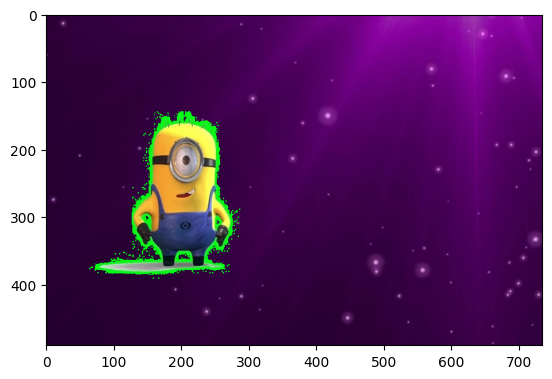

In [18]:
resimg=cv2.add(fg,bg)
plt.imshow(resimg)

Problem 3

(1)

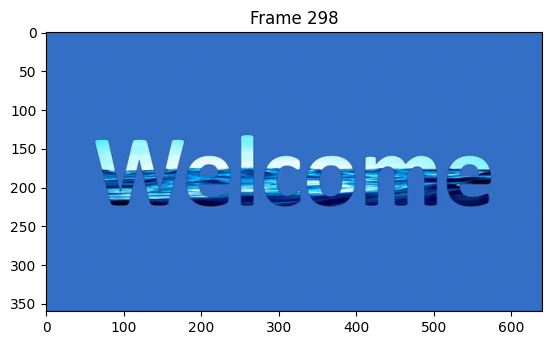

In [58]:
#video to read
videoip=cv2.VideoCapture("Welcome - 88948.mp4")
fps=videoip.get(cv2.CAP_PROP_FPS)
hght=videoip.get(cv2.CAP_PROP_FRAME_HEIGHT)
wdth=videoip.get(cv2.CAP_PROP_FRAME_WIDTH)
i=0
while True:
  status,frames=videoip.read() #it provides frame as well as the status whether the next frame is present or not in the video
  if status==False:
    break
  #storing each frame of the video
  path=r"frames\frame"+str(i)+".jpg" 
  cv2.imwrite(path,frames)
videoip.release()
cv2.destroyAllWindows()

(2)

In [66]:
fcc=cv2.VideoWriter_fourcc(*"mp4v")
videoop=cv2.VideoWriter("OUTPUT.mp4",fourcc=fcc,fps=fps,frameSize=(int(hght),int(wdth)))
i=0
path="frames"
B=int(input("Enter number of bits for quantization : "))
for i in os.listdir(path):
  path0=path+r"\\"+i
  frames=plt.imread(path0)
  frames=frames[:,:,::-1]
  frames=quantize(frames,B)
  videoop.write(frames)

videoop.release()
cv2.destroyAllWindows()